In [1]:
import pandas as pd
import seaborn as sns

### Univariate Analysis - Revision Note

**Definition**:  
Univariate analysis examines the distribution of a **single variable** (one feature at a time). It's primarily used to understand the pattern, spread, and behavior of individual variables in the dataset.

#### Key Objectives:
1. **Summarize** the variable's distribution.
2. **Detect outliers** or anomalies.
3. **Assess central tendency** (mean, median, mode).
4. **Understand variability** (range, variance, standard deviation).

#### Common Techniques:
1. **Descriptive Statistics**:
   - **Mean**: Average of the values.
   - **Median**: Middle value when sorted.
   - **Mode**: Most frequent value.
   - **Standard Deviation**: Measures spread from the mean.
   - **Range**: Difference between max and min values.

2. **Visualizations**:
   - **Histogram**: Shows frequency distribution of data.
   - **Boxplot**: Displays the 5-number summary (min, Q1, median, Q3, max) and identifies outliers.
   - **KDE Plot**: Shows the smoothed probability density function.

#### Key Use Cases:
- **Numerical Data**: Histograms, KDE plots, descriptive statistics (mean, median, etc.).
- **Categorical Data**: Bar plots, frequency counts, pie charts.

#### Example:
```python
# Numerical data analysis
sns.histplot(df['Age'], kde=True)  # Histogram + KDE for numerical variable
df['Age'].describe()  # Summary statistics

# Categorical data analysis
sns.countplot(x='Gender', data=df)  # Count plot for categorical variable
df['Gender'].value_counts()  # Frequency count


In [3]:
df = pd.read_csv('train.csv')

In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.500,B50,C
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.000,A19,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.000,NaN,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S


# Univariate Analysis of above dataset

- PassengerId -> Not so useful
- Survivied -> Categorical
- Pclass -> Categorical
- Name -> Categorical with many many categories (not so useful)
- Sex -> Categorical
- Age -> Numerical
- SibSp( Sibling or Spouse ) -> Categorical
- Parch (Parent or child) -> Categorical
- Ticket -> Not so useful
- Fare -> Numerical
- Cabin -> Has many null values
- Embarked ( from which station passenger had boarded ) -> Categorical


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 1. Categorical Data

## a. Countplot

<Axes: xlabel='count', ylabel='Embarked'>

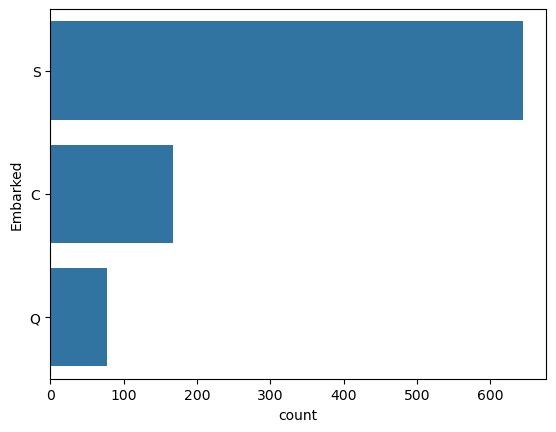

In [18]:
sns.countplot(df['Embarked'])

In [23]:
# Getting the value counts for each item in the Series
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

df['Embarked'].value_counts().plot(kind='bar')

## b. PieChart

<Axes: ylabel='count'>

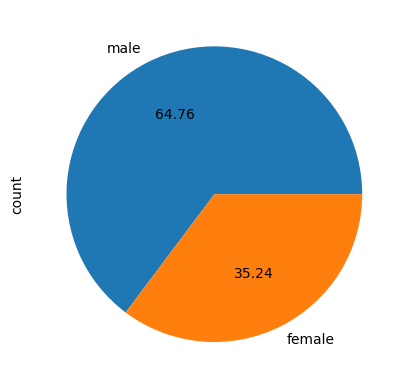

In [32]:
df['Sex'].value_counts().plot(kind='pie', autopct='%.2f')

In [34]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# 2. Numerical Data

Text(0, 0.5, 'frequency')

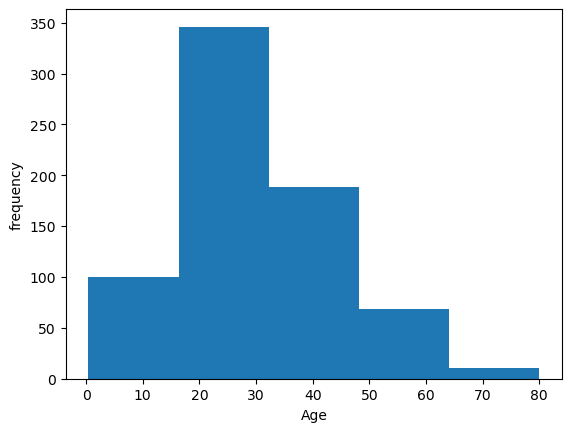

In [65]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=5)
plt.xlabel('Age')
plt.ylabel('frequency')

# Distplot

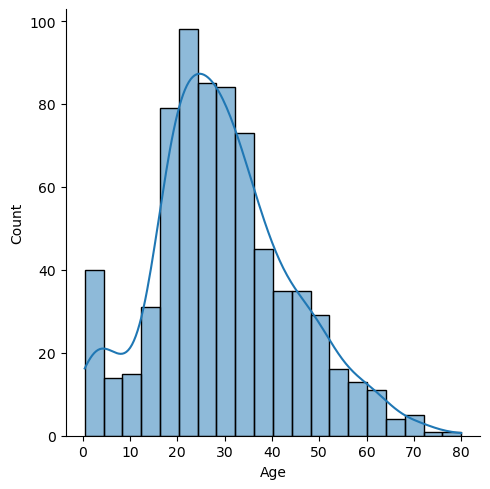

In [58]:
# KDE = kernel density estimate
sns.displot(df['Age'], kde=True)


### Kernel Density Estimate (KDE) - Revision Note

- **KDE**: Smoothed estimate of the probability density function (PDF) for continuous data.
- **Y-axis**: Represents the **density** (normalized so area under the curve = 1). It shows the relative likelihood of values.
- **X-axis**: Represents the **data values** (e.g., Age). The curve’s height at any point shows the data density around that value.

#### Key Interpretation Points:
1. **Peaks (Modes)**: Represent the most common values in the dataset.
   - High peaks = many data points around that value.
2. **Spread**: Width of the curve indicates how dispersed the data is.
   - Wider curve = more spread out; Narrower curve = more concentrated.
3. **Multiple Peaks**: Suggest multiple common values or distinct groups.
4. **Tails**: Long tails indicate outliers or extreme values in the dataset.

#### Bandwidth:
- **Controls the smoothness** of the KDE. 
   - Low bandwidth: sharp, detailed curve (may overfit noise).
   - High bandwidth: smooth, generalized curve (may miss details).
   
- Adjust with `bw_adjust` in Seaborn:  
   ```python
   sns.kdeplot(df['Age'], bw_adjust=0.5)  # Lower bandwidth (sharper)
   sns.kdeplot(df['Age'], bw_adjust=1.5)  # Higher bandwidth (smoother)


## c. Boxplot

<Axes: ylabel='Age'>

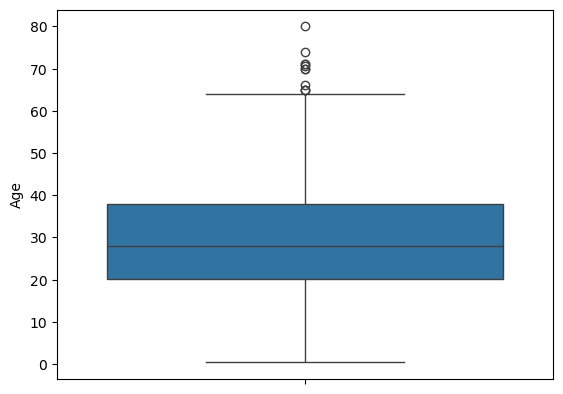

In [68]:
sns.boxplot(df['Age'])

## Interpreting boxplot
![image](https://github.com/user-attachments/assets/2e28330e-3ae3-4741-a84a-0bb58b636f20)


In [71]:
df['Age'].min()

0.42

In [73]:
df['Age'].max()

80.0

In [75]:
df['Age'].mean

<bound method Series.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [81]:
df['Age'].skew()

0.38910778230082704